# Đề Thực hành 2 Phương pháp toán cho Trí tuệ nhân tạo.
## Khoa CNTT - trường ĐH KHTN TPHCM.

Tên: Lê Nguyễn

MSSV: 21120511

## Bài 1. (3 điểm)
Cho hai ma trận sau đây

$$A=\left( \begin{matrix}
   1 & 0 & 2 & a  \\
   1 & 2 & 4 & b  \\
   -1 & 2 & 0 & c  \\
   3 & -1 & 3 & d  \\
\end{matrix} \right), B=\left( \begin{matrix}
   4 & 5 & 1 & -2  \\
   0 & 1 & 2 & 1  \\
   0 & -2 & -3 & 1  \\
   a & b & c & d  \\
\end{matrix} \right)$$
trong đó $a,b,c,d$ là $4$ số cuối trong $MSSV$ (viết theo thứ tự từ trái sang phải). Khi làm bài, $SV$ chủ động thay các mã số đó vào đề bài trên.

Bằng cách dùng các thư viện có hỗ trợ sẵn của Python, hãy thực hiện các yêu cầu sau:
* a) Tính $B+A$, $B{{A}^{T}}$, $2A-3B$.
* b) Tính $\det (A)$ , $\det ({{B}^{T}}+2I)$, $rank(AB).$ 
* c) Tính norm của vector hàng $1$ của $A,$ tính norm của vector cột $3$ của $B,$ tính tổng các phần tử trên đường chéo của $A.$
* d) Kiểm tra công thức ${{(AB)}^{T}}={{B}^{T}}{{A}^{T}}$ dựa trên hai ma trận đã cho.
* e) Sinh ngẫu nhiên một ma trận $C$ có kích thước $4\times 4$ với các phần tử là số nguyên trong miền từ $-9\to 9$, từ đó in ra các phần tử nằm phía dưới đường chéo của $A+BC.$ 
* f) Tìm ma trận $C$ thỏa mãn $AC - C = B$. *Gợi ý:* $C = CI = IC$ với $I$ là ma trận đơn vị.

In [1]:
#CODE HERE (mỗi câu hỏi làm trên một cell riêng)
import numpy as np

A: np.ndarray = np.array([[1, 0, 2, 0],
                         [1, 2, 4, 5],
                         [-1, 2, 0, 1],
                         [3, -1, 3, 1]])
B: np.ndarray = np.array([[4, 5, 1, -2],
                          [0, 1, 2, 1],
                          [0, -2, -3 ,1],
                          [0, 5, 1, 1]])

In [3]:
# a)
print("Câu A:")
print(f"ma trận B + A: \n {B + A}")
print(f"ma trận BA^T: \n {B @ A.T}")
print(f"ma trận 2A - 3B: \n {2*A - 3*B}")

Câu A:
ma trận B + A: 
 [[ 5  5  3 -2]
 [ 1  3  6  6]
 [-1  0 -3  2]
 [ 3  4  4  2]]
ma trận BA^T: 
 [[  6   8   4   8]
 [  4  15   3   6]
 [ -6 -11  -3  -6]
 [  2  19  11  -1]]
ma trận 2A - 3B: 
 [[-10 -15   1   6]
 [  2   1   2   7]
 [ -2  10   9  -1]
 [  6 -17   3  -1]]


In [4]:
# b)
print("\n Câu B:")

print(f"det(A) = {np.linalg.det(A)}")

# np.identity(B.shape[0]) will generate matrix I with have column same as B
E = B.T + 2 * np.identity(B.shape[0])
print(f"det(B^T + 2I) = {np.linalg.det(E)}")

print(f"rank(AB) = {np.linalg.matrix_rank(A @ B)}")


 Câu B:
det(A) = -16.000000000000007
det(B^T + 2I) = 77.99999999999993
rank(AB) = 4


In [5]:
# c)
print("\n Câu C:")

normRow1A = np.linalg.norm(A[0])
print(f"Norm của vector hàng 1 của A: {normRow1A}")

normCol3B = np.linalg.norm(B[:,2])
print(f"Norm của vector cột 3 của A: {normCol3B}")


 Câu C:
Norm của vector hàng 1 của A: 2.23606797749979
Norm của vector cột 3 của A: 3.872983346207417


In [6]:
# d)
print("\n Câu D:")

F = A @ B
G = B.T @ A.T
if (np.array_equal(F.T, G) == True):
    print("(AB)^T = B^T A^T là đúng")
else:
    print("(AB)^T = B^T A^T là sai")



 Câu D:
(AB)^T = B^T A^T là đúng


In [8]:
# e)
print("\n Câu E")

C = np.random.randint(-9, 10, (4, 4))
total = A + B @ C

print(f"Ma trận ngẫu nhiên C là: \n {C}")

print(f"Ma trận A + BC là: \n {total}")

print("Các phần tử dưới đường chéo chính của ma trận A + BC là:", end = " ")
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        if (i - j > 0):
            print(total[i, j], end=" ")
print("")


 Câu E
Ma trận ngẫu nhiên C là: 
 [[-4 -6  8  3]
 [ 2  4  7  8]
 [ 4 -2  2  4]
 [-4  6 -2 -8]]
Ma trận A + BC là: 
 [[  7 -18  75  72]
 [  7   8  13  13]
 [-21   6 -22 -35]
 [ 13  23  38  37]]
Các phần tử dưới đường chéo chính của ma trận A + BC là: 7 -21 6 13 23 38 


In [9]:
# f)
print("\n Câu F")

def IsInverse(A):
    # check xem A co la ma tran vuong khong va rank A co bang voi shape A khong ?
    return (A.shape[0] == A.shape[1]) and (np.linalg.matrix_rank(A) == A.shape[0])

# tao ma tran I cung shape voi A
I = np.identity(A.shape[0])

# ta biet rang AC - C = B ,vay (A - I)C = B
# tiep teho ta check (A - I) co nghich dao hay khong, neu co thi: C = (A - I)^-1 B
C = np.empty(A.shape)
if (IsInverse(A - I)):
    inv = np.linalg.inv(A - I)
    C = inv @ B
print(f"Nghiệm C của phương trình AC - C = B là: \n {C}")


 Câu F
Nghiệm C của phương trình AC - C = B là: 
 [[-1.71428571 -0.52380952 -0.80952381  1.47619048]
 [ 0.85714286  0.92857143 -1.92857143  0.42857143]
 [ 2.          2.5         0.5        -1.        ]
 [-1.42857143 -1.88095238  0.54761905  0.61904762]]


### Bài 2. (2đ)

Trong lĩnh vực xử lý ngôn ngữ tự nhiên $NLP$, với danh sách từ vựng $\mathcal{L}$ độ dài $\ell$, mỗi câu văn có thể được mô tả bởi 1 vector $v\in\mathbb{R}^{\ell}$ mà thành phần thứ $i$ cho biết số lần mà từ $d_i \in \mathcal{L}$ xuất hiện trong câu, còn được gọi là tọa độ của câu văn trong $\mathcal{L}$. Xét các câu văn sau đây:
> * $D_1$: *tôi là An*.
> * $D_2$: *tôi thích đi xem phim*.
> * $D_3$: *An rất thích xem tôi du lịch*.
> * $D_4$: *tôi rất rất thích đi du lịch, An là tên tôi*.

Giả sử rằng $\mathcal{L} =$ (*An, du, đi, là, lịch, phim, rất, tên, thích, tôi, xem*) với $|\mathcal{L}| = 11$ thì chẳng hạn câu văn $D_0$ = *tôi rất thích An An* sẽ có tọa độ là $$d_0 = (2,0,0,0,0,0,1,0,1,1,0).$$
- **a)** Viết toạ độ của các câu văn $D_1,D_2,D_3,D_4$ ở dạng vector trong không gian $11$ chiều ứng với từ vựng $\mathcal{L}$.
- **b)** Tính khoảng cách Euclid đôi một giữa các câu văn trên sử dụng thư viện *numpy.linalg*.
- **c)** Ở trên ta dùng thư viện, vậy hãy cho biết công thức Toán học cụ thể để tính khoảng cách Euclid giữa hai vector bên dưới là gì:
$$d = (x_1,x_2,...,x_{11}) \text{ và } d' = (y_1,y_2,...,y_{11})?$$

In [ ]:
#Gợi ý code mẫu
import numpy as np
d1 = np.array([...])
d2 = np.array([...])
d3 = np.array([...])
d4 = np.array([...])
D = np.vstack([d1,d2,d3,d4])
l = len(D)
for i in range(...):
    for j in range(...):
        print('Khoảng cách giữa d{} & d{} là'.format(i+1,j+1), round(..., 2))

In [10]:
import numpy as np

# a)

# D1: tôi là An
d1 = np.array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])
# D2: tôi thích đi xem phim
d2 = np.array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])
# D3: An rất thích xem tôi du lịch
d3 = np.array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
# D4: tôi rất rất thích đi du lịch, An là tên tôi
d4 = np.array([1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0])

D = np.vstack([d1, d2, d3, d4])
l = len(D)

# b)
for i in range(l):
    for j in range(l):
        print(f'Khoảng cách giữa d{i + 1} và d{j + 1} là {round(np.linalg.norm(D[i] - D[j]), 2)}')

Khoảng cách giữa d1 và d1 là 0.0
Khoảng cách giữa d1 và d2 là 2.45
Khoảng cách giữa d1 và d3 là 2.45
Khoảng cách giữa d1 và d4 là 3.0
Khoảng cách giữa d2 và d1 là 2.45
Khoảng cách giữa d2 và d2 là 0.0
Khoảng cách giữa d2 và d3 là 2.45
Khoảng cách giữa d2 và d4 là 3.32
Khoảng cách giữa d3 và d1 là 2.45
Khoảng cách giữa d3 và d2 là 2.45
Khoảng cách giữa d3 và d3 là 0.0
Khoảng cách giữa d3 và d4 là 2.24
Khoảng cách giữa d4 và d1 là 3.0
Khoảng cách giữa d4 và d2 là 3.32
Khoảng cách giữa d4 và d3 là 2.24
Khoảng cách giữa d4 và d4 là 0.0


c ) Cho:
$$d = (x_1,x_2,...,x_{11}) \text{ và } d' = (y_1,y_2,...,y_{11})$$

Công thức tính khoảng cách Euclid giữa $d$ và $d'$ là:
$$
\text{dist}(d, d') = || d - d' || = (d-d')^T(d - d') = \sqrt{ \sum_{i=1}^{11} (y_i - x_i)^2}
$$

## Bài 3. (1.5 điểm) Trong hai chọn một.
3.1) Kết quả học tập của một nhóm sinh viên ở môn **Phương pháp toán cho Trí tuệ nhân tạo** được cho trong bảng bên dưới. Sinh viên chỉ qua môn nếu điểm tổng kết không dưới $5.0$.

|Sinh viên | BT cá nhân  | Báo cáo   | Giữa kỳ   | Cuối kỳ   |
|----------|-------------|-----------|-----------|-----------|
|  A       |     8       |    7      |    6      |    4      |
|  B       |     0       |    7      |    5      |    6      |
|  C       |     3       |    9      |    4      |    5      |
|  D       |     7       |    8      |    3      |    5      |
|  E       |     10      |    10     |    10     |    9      |
|  F       |     6       |    0      |    6      |    5      |

GV đang cân nhắc cho các điểm theo trọng số nào để có lợi cho các sinh viên nhất (ít người rớt nhất), có $3$ phương án:
* $0.2, 0.2, 0.2, 0.4$.
* $0.1, 0.1, 0.3, 0.5.$
* $0.1, 0.2, 0.3, 0.4.$

Hãy giúp giảng viên lựa chọn phương án thích hợp.

In [25]:
#CODE HERE
import numpy as np
from typing import Tuple, List

diem_arr = np.array([[8, 7, 6, 4],
                [0, 7, 5, 6],
                [3, 9, 4, 5],
                [7, 8, 3, 5],
                [10, 10, 10, 9],
                [6, 0, 6, 5]])

A = (0.2, 0.2, 0.2, 0.4)
B = (0.1, 0.1, 0.3, 0.5)
C = (0.1, 0.2, 0.3, 0.4)

def SoLuongSVQuaMon(trong_so: Tuple[float]) -> int:
    global diem_arr
    
    # tinh diem tong ket cua nhom sinh vien dua tren tung trong so
    diem_sv: List[float] = []

    for i in range(diem_arr.shape[0]):
        total: float = 0

        for j in range(diem_arr.shape[1]):
            total = total + (diem_arr[i, j] * trong_so[j])

        diem_sv.append(round(total, 2))
    
    # tinh so luong sinh vien qua mon
    so_luong: int = 0

    for i in range(len(diem_sv)):
        if (diem_sv[i] >= 5.0):
            so_luong = so_luong + 1

    return so_luong

# so luong sinh vien theo cac trong so A, B, C, D
sl_A, sl_B, sl_C = SoLuongSVQuaMon(A), SoLuongSVQuaMon(B), SoLuongSVQuaMon(C)

sl_max = max(sl_A, sl_B, sl_C)

# A la phuong an toi uu
if (sl_A == sl_max):
    print(f"Diem theo trong so {A} se co loi cho hoc sinh")

# B la phuong an toi uu
if (sl_B == sl_max):
    print(f"Diem theo trong so {B} se co loi cho hoc sinh")

# C la phuong an toi uu
if (sl_C == sl_max):
    print(f"Diem theo trong so {C} se co loi cho hoc sinh")

Diem theo trong so (0.1, 0.2, 0.3, 0.4) se co loi cho hoc sinh


3.2) Cho bài toán sau, hãy bằng cách lập hệ phương trình thích hợp và giải bằng Python theo **ít nhất $2$ cách khác nhau**: <br>

Trong đợt dịch cúm Covid-19, sinh viên của một trường Đại học có nhận được trợ cấp từ nhà trường, từ địa phương và từ hội cựu sinh viên. Khảo sát trong một lớp học có ba nhóm: đang ở quê, đang ở trọ tại TPHCM và đang ở KTX trường. Biết rằng mức tiền hỗ trợ tiền:
* Của trường cho các nhóm trên lần lượt là: $200k, 600k, 400k$; 
* Của địa phương là: $500k, 500k, 500k$; 
* Của hội cựu sinh viên là: $0k, 700k, 300k.$

Biết rằng tổng tiền mà sinh viên được từ nhà trường là $37$ triệu, từ địa phương là $50$ triệu và từ hội cựu sinh viên là $29$ triệu. Tính tổng sinh viên của lớp.

In [21]:
#CODE HERE
#CODE HERE

tien_nt = 37000
tien_dp = 50000
tien_csv = 29000

# ta co hpt:
# 200x + 600y + 400z = tien_nt
# 500x + 500y + 500z = tien_dp
# 0x + 700y + 300z = tien_csv

# Cach 1: dung sympy
import sympy as sp

x, y, z = sp.symbols('x, y, z')
eq1 = sp.Eq(200*x + 600*y + 400*z, tien_nt)
eq2 = sp.Eq(500*x + 500*y + 500*z, tien_dp)
eq3 = sp.Eq(0*x + 700*y + 300*z, tien_csv)

ans = sp.solve((eq1, eq2, eq3), (x, y, z))
print(ans)

# Cach 2: dung ma tran voi numpy
import numpy as np

# hpt se duoc bien doi thanh:
# A*x = b
# voi A = ((200, 600, 400), (500, 500, 500), (0, 700, 300))
# b = (tien_nt, tien_dp, tien_csv)
# va x = A^-1b

A = np.array([[200, 600, 400], 
               [500, 500, 500],
               [0, 700, 300]])
b = np.array([tien_nt, tien_dp, tien_csv])

x = np.linalg.inv(A) @ b
print(x)

{x: 50, y: 35, z: 15}
[50. 35. 15.]


## Bài 4. (2 điểm)
Một thí nghiệm xét mối liên hệ giữa độ giảm trọng lượng của hợp chất ($y$, tính bằng gam) và khoảng thời gian mà hợp chất tiếp xúc với không khí ($x$, tính bằng năm), trong đó số âm có thể hiểu là giai đoạn xử lý nguyên liệu, trước khi điều chế ra hợp chất. Ta có bảng dữ liệu như sau:

| $x$    | $-2$ | $0$   | $1$  | $2$  | $4$   |
|--------|------|-------|------|------|-------|
| $y$    | $-1$ | $1.5$ | $3.1$| $6.3$| $11.1$| 

- **a)** Giả sử $x,y$ thỏa mãn mô hình $y=a+bx+c \ln(x^2+1).$ Hãy sử dụng phương pháp bình phương cực tiểu, ước lượng các tham số $a,b,c.$ <br>
- **b)** Vẽ đồ thị cho dữ liệu. Sử dụng kết quả trên để dự đoán $y$ khi $x = 6.5$. <br>
- **c)** Hỏi có nên dùng mô hình $y=a+bx+c \ln(x)$ hoặc $y = a+bx+\frac{c}{x}$ để xấp xỉ dữ liệu trên không? Vì sao?

In [ ]:
# Gợi ý code mẫu
A = np.array([[...],[...],[...],[...],[...]])
b = np.array([...])
#dùng công thức tính ma trận giả nghịch đảo:
...
...
...
#code để vẽ đồ thị
from matplotlib import pyplot as plt
plt.plot(..., marker=".", color="red")
... #plot các điểm khác tương tự
x = ...
y = ...
plt.plot(x,y)
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# a)

# vector X
X = np.array([-2, 0, 1, 2, 4])

# vector Y
Y = np.array([-1, 1.5, 3.1, 6.3, 11.1])

# g(x) = ln(x^2 + 1)
def g(x): 
    return np.log(x**2 + 1) 

# ma tran A theo mo hinh a + bx + cln(x^2+1)
A = np.vstack([g(X), X, np.ones(X.shape)]).T

# giai phuong trinh Ax = b, ta tim x^ gan dung voi x nhat
# x^ = (A^TA)^{-1}Ab voi b = Y
b = Y

def FindX(A):
    global b
    return np.linalg.inv(A.T @ A) @ A.T @ b

x_hat = FindX(A)
print(f"Cac tham so a = {x_hat[2]}, b = {x_hat[1]} và c = {x_hat[0]}")

Cac tham so a = 1.1444648271875475, b = 1.811518607733427 và c = 0.9221445332854217


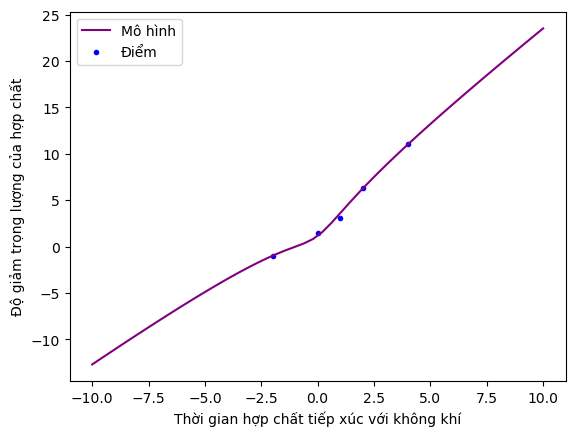

In [22]:
# b)

# f(x, coeff=[a, b, c]) = aln(x^2+1) + bx + c
def f(x, coeff):
    return coeff[0]*np.log(x**2 + 1) + coeff[1]*x + coeff[2]

domain = np.linspace(-10, 10) # mien xac dinh tu -10 -> 10

# ve mo hinh
plt.plot(domain, f(domain, x_hat), color='purple', label='Mô hình')

# ve cac diem
plt.scatter(X, Y, marker='.', color='blue', label='Điểm')

plt.xlabel('Thời gian hợp chất tiếp xúc với không khí')
plt.ylabel('Độ giảm trọng lượng của hợp chất')
plt.legend()
plt.show()

In [23]:
# b)
print(f"Gia tri y tai x = 0.65 la {f(0.65, x_hat)}")

Gia tri y tai x = 0.65 la 2.6469303058711784


c) Đầu tiên ta thấy nếu mô hình là $a + bx + cln(x)$ thì không thể dùng được do mô hình trên không xác định tại $0$, nhưng dữ liệu thì có thể $=0$. Tương tự với mô hình là $a + bx + \frac{c}{x}$.

## Bài 5. (2 điểm)
Cho ma trận: $M=\left( \begin{matrix}
   2 & a & -2  \\
   0 & 3 & 0  \\
   0 & 0 & 3  \\
\end{matrix} \right)$ trong đó $a$ là tham số thực.
* a) Cho $a=1,$ hãy chéo hóa ma trận này để thu được ma trận $D,P$ trong đó $D = P^{-1}AP$ và $D$ là ma trận đường chéo bằng cách dùng thư viện của Python (diagonalize) và kiểm chứng lại bằng việc tính toán cụ thể từng bước để tìm đa thức đặc trưng và các giá trị riêng của $M$. Từ đó hãy nêu cách tính ${{M}^{99}}$.
* b) Ma trận chéo hóa $D$ của $M$ luôn không đổi với mọi giá trị $a$ tùy ý, hãy kiểm chứng với vài giá trị cụ thể của $a$ và giải thích lý do.


In [17]:
#CODE HERE
M = np.array([[2, 1, -2],
              [0, 3, 0],
              [0, 0, 3]])
print(f"Ma tran M: \n {M}")

_,P = np.linalg.eig(M)
print(f"Ma tran nghich dao P (da chuan hoa):\n {P}")

D = np.linalg.inv(P) @ M @ P
print(f"Ma tran cheo D: \n {D}")

Ma tran M: 
 [[ 2  1 -2]
 [ 0  3  0]
 [ 0  0  3]]
Ma tran nghich dao P (da chuan hoa):
 [[ 1.          0.70710678 -0.89442719]
 [ 0.          0.70710678  0.        ]
 [ 0.          0.          0.4472136 ]]
Ma tran cheo D: 
 [[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]


Ta biết ma trận $P$ là một ma trận khả nghịch nên:
$$
D = P^{-1}MP \implies M = PDP^{-1}
$$

Khi đó:
$$
M^{n} = (PDP^{-1})^n = (PDP^{-1})(PDP^{-1})...(PDP^{-1}) = (PD^2P^{-1})...(PDP^{-1}) = PD^{n}P^{-1}
$$

Vậy có nghĩa:
$$
M^{99} = PD^{99}P^{-1}
$$

In [18]:
# mu 99
D99 = np.linalg.matrix_power(D, 99)
M99 = P @ D99 @ np.linalg.inv(P)
M99
print(f"Ma tran M^99:\n {M99}")

Ma tran M^99:
 [[ 6.33825300e+29  1.71792507e+47 -3.43585014e+47]
 [ 0.00000000e+00  1.71792507e+47  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.71792507e+47]]


Kiểm chứng lại:
- Ta có ma trận:
$$
M = \begin{pmatrix}
2 & 1 & -2 \\
0 & 3 & 0 \\
0 & 0 & 3
\end{pmatrix}
$$

- Khi đó phương trình đặc trưng của ma trận sẽ là 
$$
\begin{aligned}
f(\lambda) &= det(\lambda I - A) \\
&= det \left( \begin{pmatrix}
    \lambda - 2 & 1 & -2 \\
    0 & \lambda - 3 & 0 \\
    0 & 0 & \lambda - 3
\end{pmatrix} \right) \\
&= (\lambda - 2)(\lambda - 3)^2
\end{aligned}
$$

- Vậy phương trình $f(\lambda)$ sẽ có 3 nghiệm là $\lambda = 2$ và hai nghiệm kép $\lambda = 3$.

- Xét $\lambda = 2$, tìm vector riêng $v = (x, y, z)$ tương ứng, ta có:
$$
\begin{aligned}
(\lambda_1 I - A)v &= 0_v \hspace{10pt} \text{(ta kí hiệu vector không là $0_v$)} \\
\implies \hspace{10pt} \begin{pmatrix} 
    0 & 1 & -2 \\
    0 & -1 & 0 \\
    0 & 0 & -1 \\
\end{pmatrix}v_1 &= 0_v
\end{aligned}
$$

- Ta có:
$$
\begin{cases}
0x +y - 2z = 0 \\
0x -y + 0z = 0 \\
0x + 0y -z = 0 \\ 
\end{cases} \implies
\begin{cases}
x = \alpha \hspace{10pt} (\alpha \in \mathbb{R}) \\ 
y = 0 \\
z = 0
\end{cases}
$$

- Vậy:
$$
v = \alpha \begin{pmatrix}
1 \\
0 \\
0 
\end{pmatrix} \implies v_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}
$$

- Xét $\lambda = 3$, ta có:
$$
\begin{pmatrix}
-1 & 1 & -2  \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} v = 0_v
$$

- Ta có:
$$
\begin{cases}
-x + y -2z = 0 \\
0x + 0y + 0z = 0 \\
0x + 0y + 0z = 0 \\
\end{cases} \implies
\begin{cases}
x = \alpha - 2\beta \\
y = \alpha \hspace{10pt} (\alpha \in \mathbb{R}) \\
z = \beta \hspace{10pt} (\beta \in \mathbb{R}) \\
\end{cases}
$$

- Vậy:
$$
v = \alpha \begin{pmatrix}
1 \\
1 \\
0 \end{pmatrix} + \beta \begin{pmatrix}  
-2 \\
0 \\
1 \\
\end{pmatrix} \implies v_2 = \begin{pmatrix}
1 \\
1 \\
0 \end{pmatrix} \hspace{5pt} \text{và} \hspace{5pt}
v_3 = \begin{pmatrix}
-2 \\ 
0 \\
1
\end{pmatrix}
$$

- Vậy ma trận nghịch đảo $P$ cần tìm là:
$$
P = \begin{pmatrix} v_1 & v_2 & v_3 \end{pmatrix} = 
\begin{pmatrix}
1 & 1 & -2\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{pmatrix}
$$

- Ta dùng Gauss-Jordan để tìm ma trận $P^{-1}$:
$$
\begin{aligned}
\begin{pmatrix}
1 & 1 & -2 & | & 1 & 0 & 0\\
0 & 1 & 0 & | & 0 & 1 & 0\\
0 & 0 & 1 & | & 0 & 0 & 1\\
\end{pmatrix} &\implies
\begin{pmatrix}
1 & 0 & -2 & | & 1 & -1 & 0\\
0 & 1 & 0 & | & 0 & 1 & 0\\
0 & 0 & 1 & | & 0 & 0 & 1\\
\end{pmatrix} \\
&\implies
\begin{pmatrix}
1 & 0 & 0 & | & 1 & -1 & 2\\
0 & 1 & 0 & | & 0 & 1 & 0\\
0 & 0 & 1 & | & 0 & 0 & 1\\
\end{pmatrix}
\end{aligned}
$$

- Lúc này ma trận chéo cần tìm là:
$$
\begin{aligned}
D &= P^{-1}MP  \\
&= \begin{pmatrix}
1 & -1 & 2\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
2 & 1 & -2 \\
0 & 3 & 0 \\
0 & 0 & 3
\end{pmatrix}
\begin{pmatrix}
1 & 1 & -2\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{pmatrix} \\
&= \begin{pmatrix}
2 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 3
\end{pmatrix}
\end{aligned}
$$

In [19]:
# P theo bai lam nhu tren
P1 = np.array([[1, 1, -2],
              [0, 1, 0],
              [0, 0, 1]])
print(f"Ma tran P:\n {P1}")
print(f"Nghich dao cua P:\n {np.linalg.inv(P1)}")

D1 = np.linalg.inv(P1) @ M @ P1
print(f"Ma tran cheo D:\n {D1}")

Ma tran P:
 [[ 1  1 -2]
 [ 0  1  0]
 [ 0  0  1]]
Nghich dao cua P:
 [[ 1. -1.  2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
Ma tran cheo D:
 [[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]


b) 
- Xét ma trận:
$$
M = \begin{pmatrix}
   2 & a & -2  \\
   0 & 3 & 0  \\
   0 & 0 & 3  \\
\end{pmatrix}
$$

- Ta có thể thấy ma trận $M$ là một ma trận tam giác trên và $a$ không nằm ở đường chéo nên cho dù $a$ thay đổi thành bất cứ giá trị nào thì trị riêng của ma trận $M$ vẫn giữ nguyên.

- Vậy phương trình đặc trừng $f(\lambda)$ của $M$ có 3 nghiệm là: $\lambda = 2$ và 2 nghiệm kép $\lambda = 3$.

- Tiếp theo ta tìm các vector riêng của $M$.

- Xét $\lambda = 2$, ta có:
$$
\begin{pmatrix}
   0 & a & -2 \\
   0 & -1 & 0 \\
   0 & 0 & -1 \\
\end{pmatrix} v = 0_v
$$

- Vậy:
$$
v = \alpha \begin{pmatrix}
1 \\
0 \\
0 
\end{pmatrix} \implies v_1 = \begin{pmatrix}
1 \\
0 \\
0 
\end{pmatrix}
$$

- Xét $\lambda = 3$, ta có:
$$
\begin{pmatrix}
-1 & a & -2  \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} v = 0_v
$$

- Vậy:
$$
v = \alpha \begin{pmatrix}
a \\
1 \\
0 \end{pmatrix} + \beta \begin{pmatrix}  
-2 \\
0 \\
1 \\
\end{pmatrix} \implies v_2 = \begin{pmatrix}
a \\
1 \\
0 \end{pmatrix} \hspace{5pt} \text{và} \hspace{5pt}
v_3 = \begin{pmatrix}
-2 \\ 
0 \\
1
\end{pmatrix}
$$

- Vậy ma trận nghịch đảo $P$ cần tìm là:
$$
P = \begin{pmatrix} v_1 & v_2 & v_3 \end{pmatrix} = 
\begin{pmatrix}
1 & a & -2\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{pmatrix}
\implies
P^{-1} = \begin{pmatrix}
1 & -a & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

- Ta lại thấy:
$$
M = I + P + \begin{pmatrix}
0 & 0 & 0\\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} \hspace{5pt} \text{(đặt ma trận này là $A$)}
$$

- Vậy ta có:
$$
\begin{aligned}
D &= P^{-1}MP \\
&= P^{-1}(I + P + A)P \\
&= P^{-1}IP + P^{-1}PP + P^{-1}AP \\
&= I + P + P^{-1}AP 
\end{aligned}
$$

- Xét tích $P^{-1}AP$, ta có:
$$
P^{-1}A = \begin{pmatrix}
1 & -a & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} \begin{pmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} = \begin{pmatrix}
0 & -a & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} \hspace{5pt} \text{(giữ lại cột 2 và 3, tương ứng với 2 pivot của ma trận $A$)}
$$

- Tiếp tục, ta có:
$$
\begin{aligned}
P^{-1}AP &= \begin{pmatrix}
0 & -a & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}P \\
&= \left(P^{-1} - \begin{pmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} \right) P \\
&= I - \begin{pmatrix}
1 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
1 & a & -2 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \\
&= I - \begin{pmatrix}
1 & a & -2 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} \hspace{5pt} \text{(chỉ giữ lại dòng 1, tương ứng với pivot)} \\
&= \begin{pmatrix}
0 & -a & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
\end{aligned} 
$$

- Cuối cùng, ta hoàn thiện được phương trình cho $D$:
$$
\begin{aligned}
D &= I + P + P^{-1}AP \\
&= \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} +
\begin{pmatrix}
1 & a & -2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} + \begin{pmatrix}
0 & -a & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix} \\
&= \begin{pmatrix}
2 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 3 \\
\end{pmatrix}
\end{aligned}
$$

- Vậy kết luận lại, giá trị của ma trận chéo $D$ không đổi với mọi giá trị $a$ tuỳ ý.